In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
import shutil
import warnings
from typing import List
from typing import Tuple

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D

from tensorflow.keras.models import load_model

2024-08-03 04:32:47.488996: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 04:32:47.775680: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 04:32:48.582748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = load_model('EFlow Images/Eflowimageclassifier3.keras')

In [4]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (5, 5, 3, 128)
conv2d_1 (3, 3, 128, 64)
conv2d_2 (3, 3, 64, 32)
conv2d_3 (2, 2, 32, 16)
conv2d_4 (2, 2, 16, 8)


(3, 3, 128, 64)


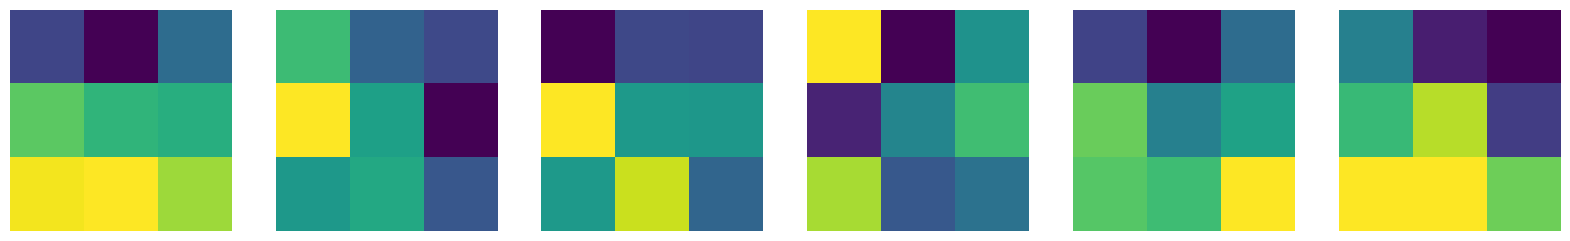

In [20]:
# Function to visualize the filters of a convolutional layer
def visualize_filters(layer_name, num_kernels=9):
    layer = model.get_layer(name=layer_name)
    if 'conv' not in layer_name or not isinstance(layer, tf.keras.layers.Conv2D):
        raise ValueError(f"Layer {layer_name} is not a Conv2D layer.")
    
    # Get the kernel weights from the layer
    kernels, biases = layer.get_weights()
    
    # Normalize the kernel values to 0-1 range for visualization
    min_val = np.min(kernels)
    max_val = np.max(kernels)
    kernels = (kernels - min_val) / (max_val - min_val)
    
    # Number of filters
    num_filters = kernels.shape
    print(num_filters)
    
    filter_index = 0  # Index of the filter to visualize
    num_channels_to_display = 6  # Number of channels to display for this filter

    fig, axes = plt.subplots(1, num_channels_to_display, figsize=(20, 8))
    for i in range(num_channels_to_display):
        ax = axes[i]
        im = ax.imshow(kernels[:, :, i, filter_index], cmap='viridis')
        ax.axis('off')
    plt.show()

# Visualize filters from a specific convolutional layer by name
visualize_filters('conv2d_1')  # Replace 'conv2d_1' with the name of your convolutional layer
